<h1> Elo Merchant Category Recommendation :</h1>

Adapted from : "Make Sense Out of Nonsense : ELO EDA, Kundan Jha"

<h2>Business Problem / Problem Statement :</h2>

> Elo Merchant Category Recommendation is a Kaggle competition which is provided by Elo.  It is the largest payment brand in Brazil with marketing strategy to offer promotions and discounts with merchants.  The marketing objective is to enhance loyalty and stickiness with its customers so as to elevate its brand in the market.  For example, if a customer is to use the Elo promo card with a diversity of merchants for a long period of time, this could mean that the customer has loyalty high with Elo.  In order to retain the customer as a Elo card subscriber, it could organise different promotional reward campaigns with great relevance to the customer’s favorite or frequently patronised merchants.  These personalized reward programs are executed so as to retain existing customers from churn and attract new customers.  If done right, the frequency of using the Elo payment brand should increase over time; thus, with personalised marketing the customers would consciously increase the usage of Elo card.

> The main task is to find a metric which will reflect the cardholder’s loyalty (loyalty score) with Elo payment brand.  Here we have the loyalty score which is a numerical score calculated 2 months after the historical and evaluation period.  Potentially, Elo uses it as part of its business decisions for the organised promotional campaigns.


<h2>Dataset Overview :</h2>

The datasets are largely anonymised with no detail descriptions of the 3 categorical features.  External data could be used.

The problem has 5 datasets.

> **train.csv (201917, 6) :** It has 6 features namely first_active_month, card-id, feature1, feature2, feature3 and target

> **test.csv (123623, 5) :** The test set has the same features as the train set without targets

> **historical_transactions.csv (29112361, 14) :** It contains up to 3 months worth of historical transactions for each card_id

> **merchants.csv (334696, 22):** It contains additional information about all merchants / merchant_ids in the dataset.

> **new_merchant_transactions.csv (1963031, 14) :** It contains two months’ worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.

**Observations :**
> In all these datasets, there is no text data feature with only categorical and numerical features.  Moreover, from 'historical_transactions.csv' and 'new_merchant_transactions.csv', we realised that the historical transactions are the transactions occurred before the "reference date" and new merchant transactions - the ones that occurred after the reference date (according to the 'month_lag' field, which described as "month lag to reference date").

<h2>Mapping the real-world problem to Machine Learning problem :</h2>

> In terms of Machine Learning, we need to have an metric to measure the customer's loyalty.  The loyalty score is assigned as a target for each of the card_id present in train data.

>**Input Features —** Cardholder’s purchase amounts, usage week/day/time, installments, merchant details and others.

>**Target Variable —** Loyalty Score

>The Loyalty Score is the target variable for which the Machine Learning Model should be built to predict. 
**What is loyalty?** According to the Data_Dictionary.xlsx, **loyalty is a numerical score calculated 2 months after historical and evaluation period.**  The Loyalty score depends on many aspects of the customers for example, the purchase history, usage time, merchant’s diversity and others.  Loyalty scores are real-numbers which means we will go for a supervised machine learning regression model to solve this problem.  The provided features will be used as our input in train data and the model output will be a predicted real number value which corresponds to the loyalty score.

<h2>Real-world constraints :</h2>

> The main constraint is that the provided data is not real-customer data and it has been obfuscated and could be simulated.  Simulated data could  artificially induced bias which will affect the prediction model performance.  We will have to deal with this specifically.

<h2>Performance Metric :</h2>

> Root mean square error(RMSE) is used to evaluate our predicted value with the actual loyalty score and the task is to have a lower RMSE score.  This performance indicator will provide us the knowledge with the given input features, how close our trained model predictions are compared to actual predictions.


**My understanding of the problem :**

* Based on the data in 'historical_transactions.csv', Elo recommends the new mechants to each card holder.
* The date when Elo began providing recommentations is referred as the 'reference date'.
* The recommended merchant data is not provided so we do not know the recommendation algorithm used by Elo.
* After the reference date, Elo will gather transaction history of each card for all new merchants that are transacted with the card.
* By comparing each card's new merchant activity and the undisclosed list of the merchants recommended by Elo, the loyalty score would be calculated.
* **The goal is to evaluate our predictions against unknown Elo's recommendation algorithm, with an attempt in having the least prediction errors provided by our trained model.**

**Reduce the memory usage :**

In [1]:
## Reference: https://www.kaggle.com/rinnqd/reduce-memory-usage

def reduce_memory_usage(df, verbose=True):
  '''
  This function reduces the memory sizes of dataframe by changing the datatypes of the columns.
  Parameters
  df - DataFrame whose size to be reduced
  verbose - Boolean, to mention the verbose required or not.
  '''
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
      col_type = df[col].dtypes
      if col_type in numerics:
          c_min = df[col].min()
          c_max = df[col].max()
          if str(col_type)[:3] == 'int':
              if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                  df[col] = df[col].astype(np.int8)
              elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                  df[col] = df[col].astype(np.int16)
              elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                  df[col] = df[col].astype(np.int32)
              elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                  df[col] = df[col].astype(np.int64)
          else:
              c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
              if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                  df[col] = df[col].astype(np.float16)
              elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                  df[col] = df[col].astype(np.float32)
              else:
                  df[col] = df[col].astype(np.float64)
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

**Import all the libraries :**

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style("whitegrid")
import warnings 
warnings.simplefilter("ignore")

# For computing Variable Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Loading Data :**


In [3]:
train_data = pd.read_csv('../input/elo-merchant-category-recommendation/train.csv')
test_data = pd.read_csv('../input/elo-merchant-category-recommendation/test.csv')
historical_data = pd.read_csv('../input/elo-merchant-category-recommendation/historical_transactions.csv')
newmerchant_data = pd.read_csv('../input/elo-merchant-category-recommendation/new_merchant_transactions.csv')
merchants_data = pd.read_csv('../input/elo-merchant-category-recommendation/merchants.csv')

In [4]:
train_data.shape,  test_data.shape, historical_data.shape, newmerchant_data.shape, merchants_data.shape

((201917, 6), (123623, 5), (29112361, 14), (1963031, 14), (334696, 22))

**Reduce memory usage of data :**

In [5]:
train_data = reduce_memory_usage(train_data)
test_data = reduce_memory_usage(test_data)
historical_data = reduce_memory_usage(historical_data)
newmerchant_data = reduce_memory_usage(newmerchant_data)
merchants_data = reduce_memory_usage(merchants_data)

Mem. usage decreased to  5.20 Mb (43.7% reduction)
Mem. usage decreased to  2.24 Mb (52.5% reduction)
Mem. usage decreased to 2026.75 Mb (34.8% reduction)
Mem. usage decreased to 136.66 Mb (34.8% reduction)
Mem. usage decreased to 39.90 Mb (29.0% reduction)


<h2>Exploring the train and test data files :</h2>

In [6]:
# Read excel-formatted data dictionary file with pandas
# data_dictionary=pd.read_excel('../input/elo-merchant-category-recommendation/Data Dictionary.xlsx')
# data_dictionary

**Observations :**

* This DataDictionary file have the description of all the features in Description column which were included in train.csv.

* From second row we have columns which have the description of all the columns in our data and third row tell us about the card_id and third one is about the first_active_month which tell us about the month and year of purchase of products.

* feature_1, feature_2, feature_3 has categorical value which is in row fourth,fifth,and sixth.

* last row tells us about the prediction on the basis of these features which is known as target column. or we can say loyalty score which is calculated after the two months.

The number of rows in train_data is: 201917
The number of rows in test_data is: 123623


([<matplotlib.axis.XTick at 0x7f9fbfa9b590>,
 [Text(0, 0, 'train_rows'), Text(1, 0, 'test_rows')])

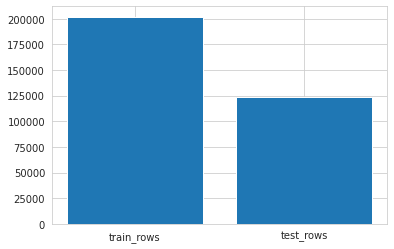

In [7]:
print('The number of rows in train_data is:',train_data.shape[0])
print('The number of rows in test_data is:',test_data.shape[0])
plt.bar([0,1],[train_data.shape[0],test_data.shape[0]])
plt.xticks([0,1],['train_rows','test_rows'])

In [8]:
train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [9]:
test_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [10]:
train_data.info()
print("********************************************************************")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int8   
 3   feature_2           201917 non-null  int8   
 4   feature_3           201917 non-null  int8   
 5   target              201917 non-null  float64
dtypes: float64(1), int8(3), object(2)
memory usage: 5.2+ MB
********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int8  
 3   

**Obsaervations :**

* The main data train has 6 values. 'first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3', 'target'.
* first_active_month : This is active_month for card_id. 
* feature_1,2,3 : it is key important but hidden meaning.
* target : Loyalty numerical score calculated 2 months after historical and evaluation period
* We can infer that both the data have same columns and overall same structure. So, We will explore both data simultaneously.


**Missing values in train and test data :
(Check for nan values in the whole train and test data)**

In [11]:
train_data.isna().any()

first_active_month    False
card_id               False
feature_1             False
feature_2             False
feature_3             False
target                False
dtype: bool

**Observation :** In train Data there is no nan values for any features in train data

In [12]:
test_data.isna().any()

first_active_month     True
card_id               False
feature_1             False
feature_2             False
feature_3             False
dtype: bool

In [13]:
test_data[test_data['first_active_month'].isna()]

,first_active_month,card_id,feature_1,feature_2,feature_3
11578,NaN,C_ID_c27b4f80f7,5,2,1


**Observation :**
In the Test Data, there is one row with 'first_active_month' as nan value. Since it is test data we have to impute the value.

**Feature comparison in train and test data features :**

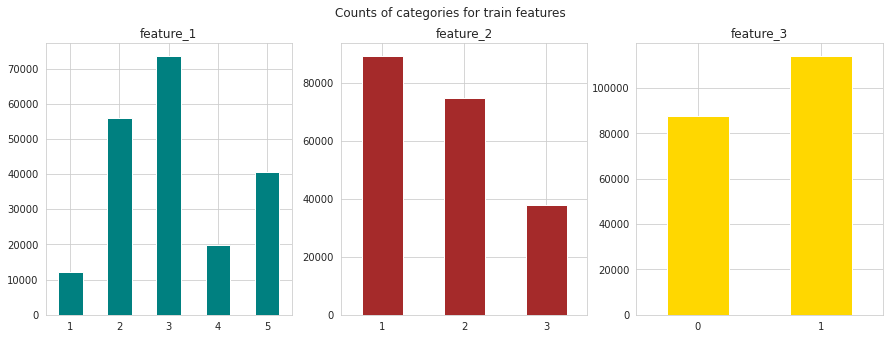

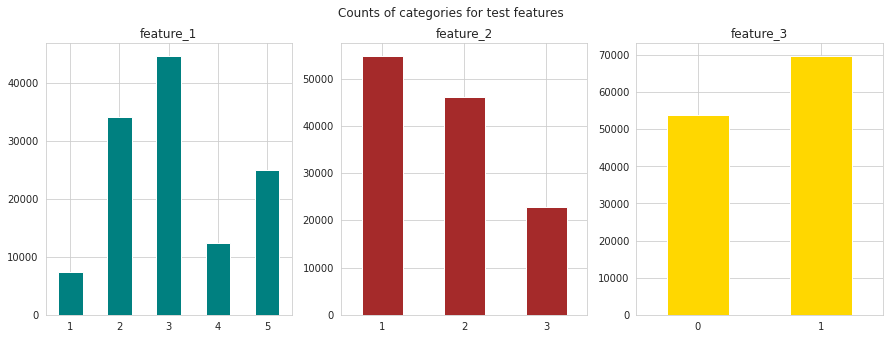

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5));
train_data['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1', rot=0);
train_data['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2', rot=0);
train_data['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3', rot=0);
plt.suptitle('Counts of categories for train features');

fig, ax = plt.subplots(1, 3, figsize = (15, 5));
test_data['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1', rot=0);
test_data['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2', rot=0);
test_data['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3', rot=0);
plt.suptitle('Counts of categories for test features');

**Observations :**

* We can see from above plots that test and train data are distributed similarly.
* feature_1, feature_2, feature_3, all are categorical variables
* feature_1 has 5 unique values
* feature_2 has 3 unique values
* feature_3 is a binary column

In [15]:
# No. of unique values; not all target values are unique (total number : 201917)
train_data['feature_1'].nunique(), train_data['feature_2'].nunique(), train_data['feature_3'].nunique(), train_data['target'].nunique()

(5, 3, 2, 197110)

**Anonymised Features Analysis : feature_1, feature_2, feature_3**

**checking distributions with target :**

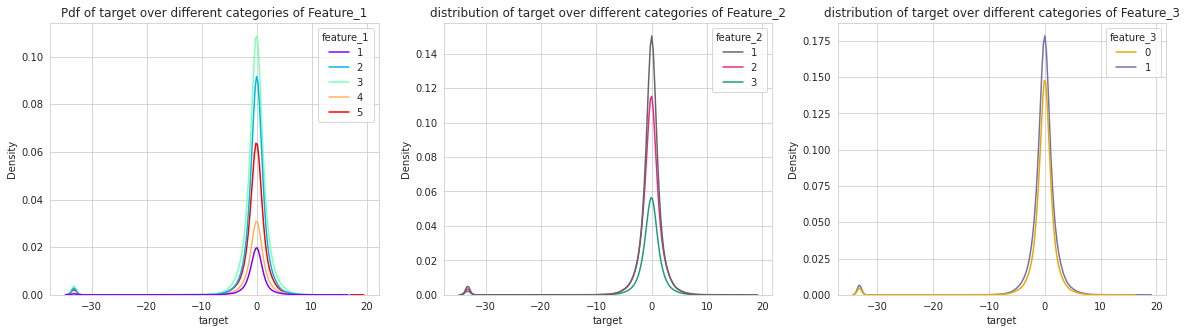

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.kdeplot(x ='target',data = train_data,hue = 'feature_1',palette='rainbow')
plt.title('Pdf of target over different categories of Feature_1')
plt.subplot(132)
sns.kdeplot(x ='target',data = train_data,hue = 'feature_2',palette='Dark2_r')
plt.title('distribution of target over different categories of Feature_2')
plt.subplot(133)
sns.kdeplot(x ='target',data = train_data,hue = 'feature_3',palette='Dark2_r')
plt.title('distribution of target over different categories of Feature_3')
plt.show()

**Observations :** 

The above two plots show a key point : 

* while different categories of these features could have various counts, the distribution of target is almost the same. This could mean, that these features aren't really good at predicting target - we'll need other features and feature engineering. Also it is worth noticing that mean target values of each catogory of these features is near zero. This could mean that data was sampled from normal distribution.

**Note:** The same information can be gathered by using box-plot and violin-plot, I have tried all of them. Here, I use kdeplot as I found it more visually appealing. In further analysis I have used Box-plot more often.

**let's see Target column seperately :**

In [17]:
train_data['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

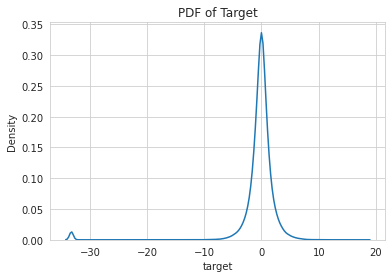

In [18]:
#Plotting the estimated pdf of target variable with kernel density estimation (KDE)
sns.kdeplot(train_data['target'])
plt.title("PDF of Target")
plt.show()

**Observation:** The target value is almost normally distributed with bunch of outlier value near -30. This distribution indicates that the target value is normalized with pre-decided mean and standard deviation.

This outlier value of the target is a value which needs more look into the feature EDA to understand cause of it.

**Analyze the outliers :**



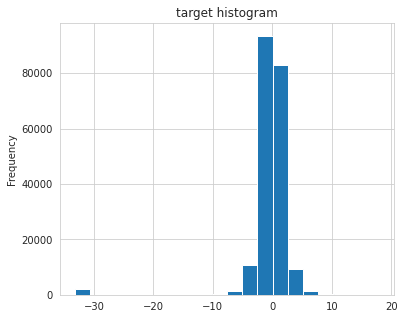

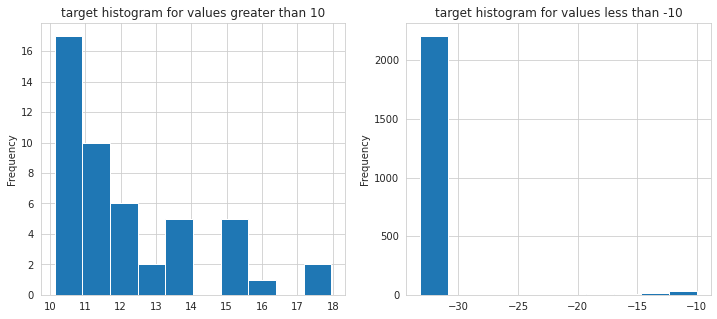

In [19]:
loyality_score = train_data['target']
ax = loyality_score.plot.hist(bins=20, figsize=(6, 5))
_ = ax.set_title("target histogram")
plt.show()

fig, axs = plt.subplots(1,2, figsize=(12, 5))
_ = loyality_score[loyality_score > 10].plot.hist(ax=axs[0])
_ = axs[0].set_title("target histogram for values greater than 10")
_ = loyality_score[loyality_score < -10].plot.hist(ax=axs[1])
_ = axs[1].set_title("target histogram for values less than -10")
plt.show()


**Observations :**

* Values range from -33.2 to 17.9

* -33 seems like an outlier as can be seen in the 3rd plot

* other values less than -10 also seem like outliers due to very less in number

* All values above 10 are also looking like outliers

In [20]:
target_sign = loyality_score.apply(lambda x: 0 if x <= 0 else 1)
target_sign.value_counts()

0    104308
1     97609
Name: target, dtype: int64

**Observation :** Negative and positive target values are almost in the same proportion

In [21]:
outliers_in_target= train_data.loc[(train_data['target']< -10) | (train_data['target']>10)]
print(' The number of outliers in the data is:',outliers_in_target.shape[0])
non_outliers_in_target= train_data.loc[(train_data['target'] >=-10) & (train_data['target']<=10)]
print(' The number of non-outliers in the data is:',non_outliers_in_target.shape[0])

 The number of outliers in the data is: 2312
 The number of non-outliers in the data is: 199605


Outliers comparison with the feature of target :

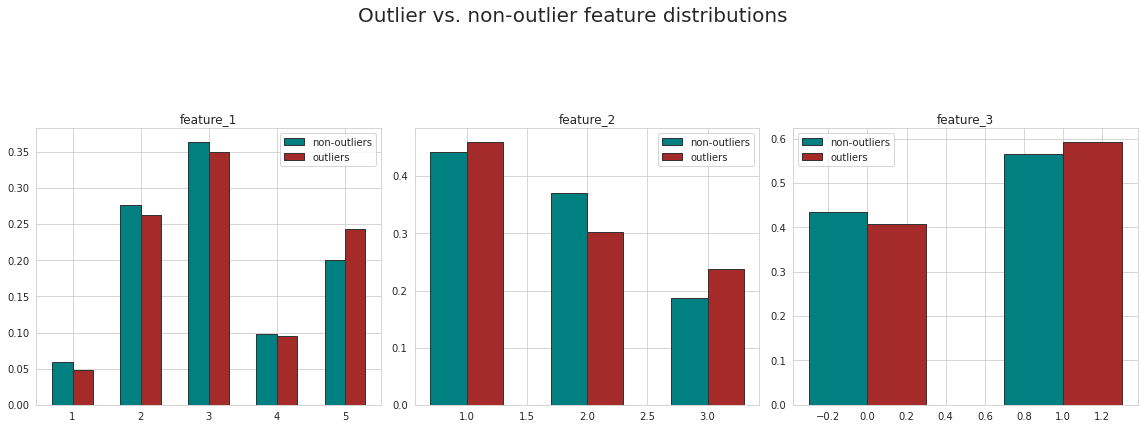

In [22]:
plt.figure(figsize=[16,9])
plt.suptitle('Outlier vs. non-outlier feature distributions', fontsize=20, y=1.1)

for num, col in enumerate(['feature_1', 'feature_2', 'feature_3', 'target']):
    if col is not 'target':
        plt.subplot(2, 3, num+1)
        non_outlier = non_outliers_in_target[col].value_counts() / non_outliers_in_target.shape[0]
        plt.bar(non_outlier.index, non_outlier, label=('non-outliers'), align='edge', width=-0.3, edgecolor=[0.2]*3,color=['teal'])
        outlier = outliers_in_target[col].value_counts() / outliers_in_target.shape[0]
        plt.bar(outlier.index, outlier, label=('outliers'), align='edge', width=0.3, edgecolor=[0.2]*3,color=['brown'])
        plt.title(col)
        plt.legend()

plt.tight_layout()
plt.show()

**Observations :**

* We can see There are only slight differences between outliers and non-outliers, but they don't seem to be that big and they certainly can't explain the difference between the target values, at least based on the features in the train dataset. It means the card_id's having outliers as loyality score having pretty much similar properties to the regular ones.

* Outliers could be one of the main purposes of this competition. May be those represent fraud or credit default etc. i.e. they are important. The target variable is normally distributed, and outliers seem to be purposely introduced in the loyalty formula. 

* As noted in multiple threads over kaggle, more than half of the RMSE is due to the outliers with loyalty scores of ~ -33. They strongly mention, If we try to replace these outliers with the median, retrain the model and submit, we will
find our leaderboard score WORSE than if we keep the outliers at their original values. Impute any values will significantly affect the RMSE score for test set. So, imputations have been excluded. This tells us that outliers are included in the test set. Furthermore, given the magnitude of the impact of outliers on the RMSE score, Our focus should be on predicting those outliers as accurately as possible.

* For mitigating the impact of outliers, We can make the outliers as a binary feature whether card's target value is outliers or not. So that while training our model can learn that given entry has target score as outlier or not and use this information while predicting loyality score.

**Analysis of feature First_active_month :**

Distribution of first_active_month across years :

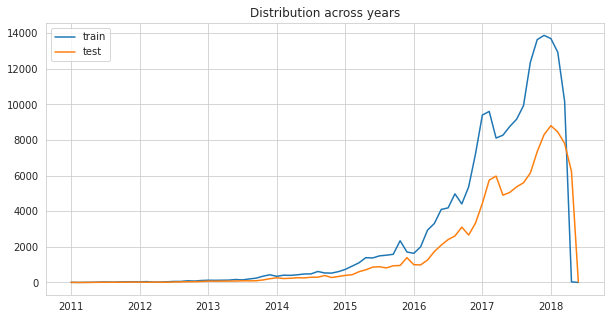

In [23]:
year_train = train_data['first_active_month'].value_counts().sort_index()
year_test = test_data['first_active_month'].value_counts().sort_index()
ax = year_train.plot(figsize=(10, 5))
ax = year_test.plot(figsize=(10, 5))
_ = ax.set_xticklabels(range(2010, 2020))
_ = ax.set_title("Distribution across years")
_ = ax.legend(['train', 'test'])

**Observation :** Years range from 2011 to 2018. But, Most of the data lies in the years ranging from 2016 to 2018 and trends of counts for train and test data are similar.

Distribution of first_active_month across months :

In [24]:
train_data['first_active_month'].head()

0    2017-06
1    2017-01
2    2016-08
3    2017-09
4    2017-11
Name: first_active_month, dtype: object

In [25]:
# Feature Extraction
train_data["month"] = train_data['first_active_month'].str.split("-").str[1]
train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,month
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,06
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,01
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,08
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,09
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,11


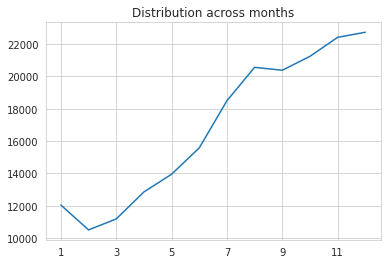

In [26]:
temp = train_data['month'].value_counts().sort_index()
ax = temp.plot()
_ = ax.set_xticklabels(range(-1, 15, 2))
_ = ax.set_title("Distribution across months")

**Observations :** Last 6 months (July to December) has relatively more data than first 6 months (January to June).

**First_active_month Vs Target variable :**

In [27]:
train_data['first_active_month'] = pd.to_datetime(train_data['first_active_month'],
                                                  format='%Y-%m')

In [28]:
train_data['first_active_month'].head()

0   2017-06-01
1   2017-01-01
2   2016-08-01
3   2017-09-01
4   2017-11-01
Name: first_active_month, dtype: datetime64[ns]

<AxesSubplot:xlabel='target'>

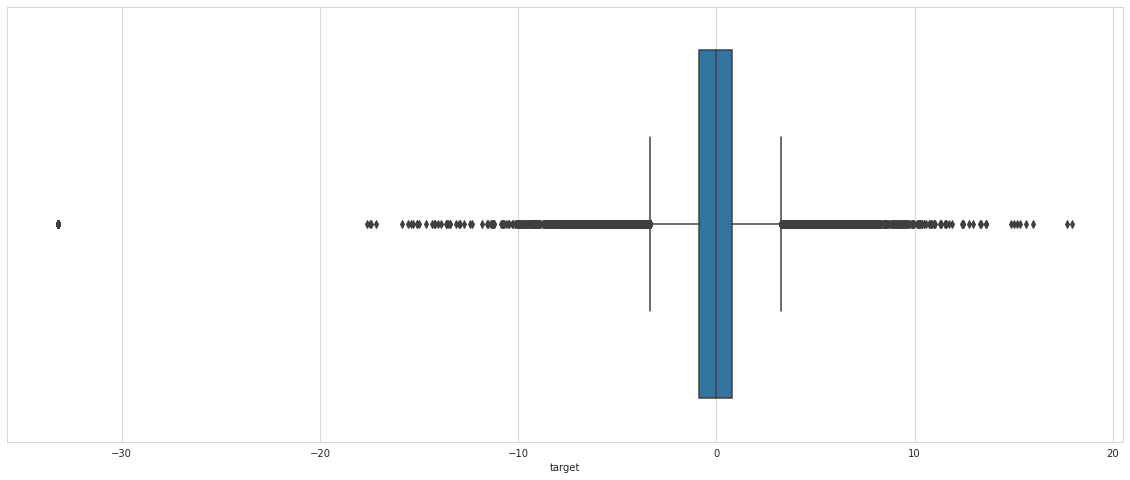

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.boxplot(x=train_data["target"])

**Correlation between variables : Pearson Correlation (Bi-variate)**

<AxesSubplot:title={'center':'Pearson Correlation of anonymise Features with Target'}>

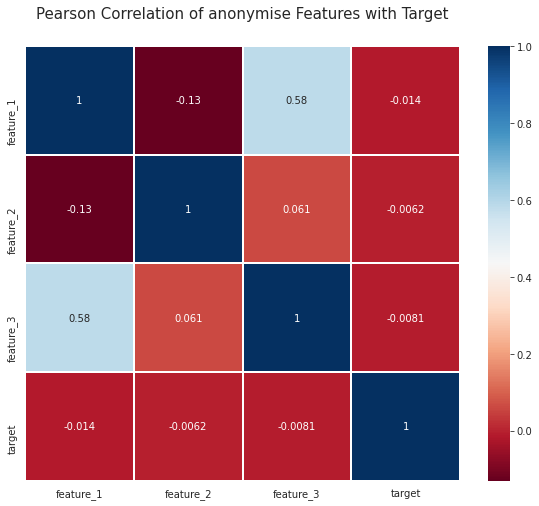

In [30]:
features_correlation = pd.DataFrame(train_data, columns=['feature_1', 'feature_2', 'feature_3', 'target'])

colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of anonymise Features with Target', y=1.05, size=15)
sns.heatmap(features_correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

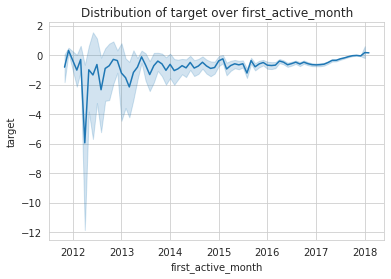

In [31]:
sns.lineplot(x = train_data['first_active_month'], y= train_data['target'])
plt.title("Distribution of target over first_active_month")
plt.show()

**Observations :**

* The above plot reveals that the target variable (loyalty score) behaves like a damping frequency plot. And it is mentioned in the Buisness problem that the target score is calcuated with the recent year transactions.

* Older Card's: The cards which have first active month from 2012 to 2015.

* new card's: The cards which have first active month from 2015 to 2018.

* The Older card's have large number of transactions which affects the target towards the negative value. and the new card's have transactions which affects the target towards positive value.

So, I think the type of transactions by the newer card's is different from the older card's which helps in increase the loyalty Score.



**Correlation between variables : Variance Inflation Factor (Multicollinearity)**

Reference : https://www.statisticshowto.com/variance-inflation-factor

**Abstract :**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.  Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

- VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
- VIF score of an independent variable represents how well the variable is explained by other independent variables.
- VIF = 1 / (1 - R^2)
- R^2 means that the variable is highly correlated with the other variables
- The closer R^2 value is to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable
- Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables.  VIF is preferred as it can show the correlation of a variable with a group of other variables.
- Dropping variables should be an iterative process starting with the variable having the largest VIF value because its trend is highly captured by other variables. If you do this, you will notice that VIF values for other variables would have reduced too, although to a varying extent
- When you care more about how much each individual feature rather than a group of features affects the target variable, then removing multicollinearity may be a good option
- If multicollinearity is not present in the features you are interested in, then multicollinearity may not be a problem
- Knowledge about multicollinearity can be quite helpful when you’re building interpretable machine learning models

A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be. In general, a VIF above 10 indicates high correlation and is cause for concern. Some authors suggest a more conservative level of 2.5 or above.

In [32]:
#Finding Correlation between variables of train_data features
selected_columns = ['feature_1','feature_2','feature_3']
data_frame = train_data[selected_columns]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,0.000327,feature_1
1,0.000158,feature_2
2,0.000653,feature_3


In [33]:
#Finding Correlation between variables of test_data features
selected_columns = ['feature_1','feature_2','feature_3']
data_frame = test_data[selected_columns]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,0.000284,feature_1
1,0.000198,feature_2
2,-0.005716,feature_3


**Observations :** 

* The VIF values for all the three features are well under 10. So, there is no problem of multicollinearity in the train data and test data.
* Also VIF values are very near to 0, which interpret that features are not at all correlated.

<h2>Exploring the historical_transactions and new_merchant_transactions data files :</h2>

In [34]:
# Read excel-formatted data dictionary file with pandas
#data_dictionary = pd.read_excel('../input/elo-merchant-category-recommendation/Data_Dictionary.xlsx', sheet_name='history')
#data_dictionary

In [35]:
# Read excel-formatted data dictionary file with pandas
#data_dictionary = pd.read_excel('../input/elo-merchant-category-recommendation/Data_Dictionary.xlsx', sheet_name='new_merchant_period')
#data_dictionary

**Observation :** After going through "history" and "new_merchant_period" worksheets in Data Dictionary.xlsx, We can infer that both the data have same columns and overall same structure. So, We will Explore both data side by side.

In [36]:
print(f'{historical_data.shape[0]} rows in historical transactions!\n')
historical_data.head()

29112361 rows in historical transactions!



,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [37]:
print(f'{newmerchant_data.shape[0]} rows in new merchants data!\n')
newmerchant_data.head()

1963031 rows in new merchants data!



,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [38]:
historical_data.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


**Observations :**

We can see that there are:

* 6 features type ID: card_id, merchant_category_id, subsector_id, merchant_id, city_id, state_id

* 2 features type integer/counter: month_lag, installments

* 1 feature type numerical: purchase_amount

* 1 feature type date: purchase_date

* 4 features type categorical: authorized_flag, category_3, category_1, category_2

In [39]:
# By default, Non-Null Counts are shown only if the DataFrame is smaller than
# pandas.options.display.max_info_rows and pandas.options.display.max_info_columns.
historical_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   authorized_flag       29112361 non-null  object 
 1   card_id               29112361 non-null  object 
 2   city_id               29112361 non-null  int16  
 3   category_1            29112361 non-null  object 
 4   installments          29112361 non-null  int16  
 5   category_3            28934202 non-null  object 
 6   merchant_category_id  29112361 non-null  int16  
 7   merchant_id           28973880 non-null  object 
 8   month_lag             29112361 non-null  int8   
 9   purchase_amount       29112361 non-null  float64
 10  purchase_date         29112361 non-null  object 
 11  category_2            26459497 non-null  float64
 12  state_id              29112361 non-null  int8   
 13  subsector_id          29112361 non-null  int8   
dtypes: float64(2), i

In [40]:
# category_3, merchant_id and category_2 have null values
historical_data.isna().any()

authorized_flag         False
card_id                 False
city_id                 False
category_1              False
installments            False
category_3               True
merchant_category_id    False
merchant_id              True
month_lag               False
purchase_amount         False
purchase_date           False
category_2               True
state_id                False
subsector_id            False
dtype: bool

In [41]:
newmerchant_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   authorized_flag       1963031 non-null  object 
 1   card_id               1963031 non-null  object 
 2   city_id               1963031 non-null  int16  
 3   category_1            1963031 non-null  object 
 4   installments          1963031 non-null  int16  
 5   category_3            1907109 non-null  object 
 6   merchant_category_id  1963031 non-null  int16  
 7   merchant_id           1936815 non-null  object 
 8   month_lag             1963031 non-null  int8   
 9   purchase_amount       1963031 non-null  float64
 10  purchase_date         1963031 non-null  object 
 11  category_2            1851286 non-null  float64
 12  state_id              1963031 non-null  int8   
 13  subsector_id          1963031 non-null  int8   
dtypes: float64(2), int16(3), int8(3), 

In [42]:
# category_3, merchant_id and category_2 have null values
newmerchant_data.isna().any()

authorized_flag         False
card_id                 False
city_id                 False
category_1              False
installments            False
category_3               True
merchant_category_id    False
merchant_id              True
month_lag               False
purchase_amount         False
purchase_date           False
category_2               True
state_id                False
subsector_id            False
dtype: bool

**Observations :** Both historical_transaction and new_merchant_transaction have Nan values in same columns which are : merchand_id, category_2, category_3.

**Analysis of Category Features : category_1,category_2 and category_3**

In [43]:
print('Value counts for category features of Historical Transactions :\n')
print(historical_data['category_1'].value_counts())
print('*****************************')
print(historical_data['category_2'].value_counts())
print('*****************************')
print(historical_data['category_3'].value_counts())

print('\nValue counts for category features of New merchant Transactions :\n')
print(newmerchant_data['category_1'].value_counts())
print('*****************************')
print(newmerchant_data['category_2'].value_counts())
print('*****************************')
print(newmerchant_data['category_3'].value_counts())

Value counts for category features of Historical Transactions :

N    27028332
Y     2084029
Name: category_1, dtype: int64
*****************************
1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64
*****************************
A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

Value counts for category features of New merchant Transactions :

N    1899935
Y      63096
Name: category_1, dtype: int64
*****************************
1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64
*****************************
A    922244
B    836178
C    148687
Name: category_3, dtype: int64


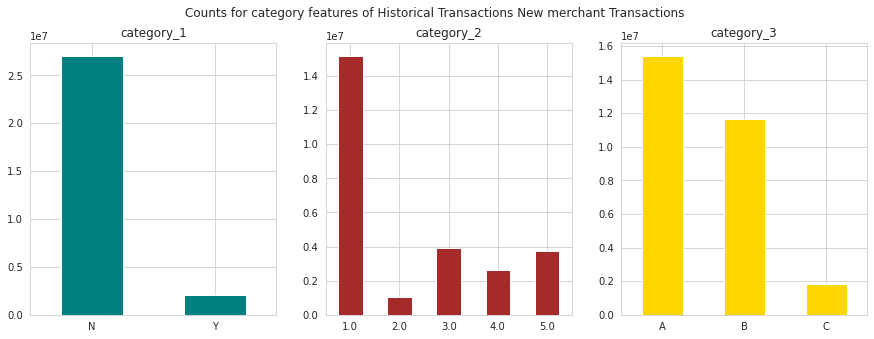

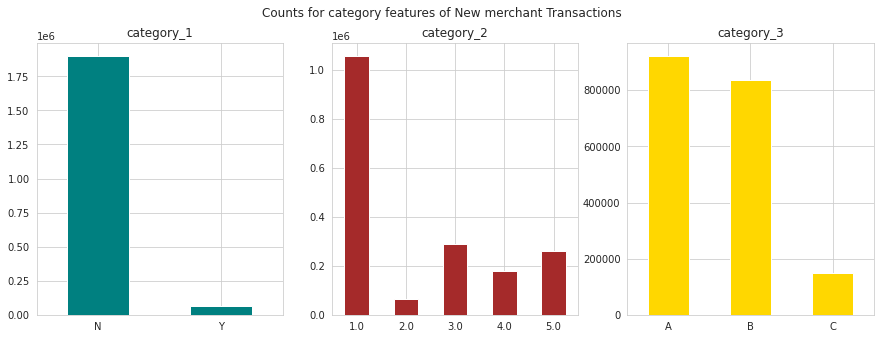

In [44]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5));
historical_data['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='category_1', rot=0);
historical_data['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2', rot=0);
historical_data['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_3', rot=0);
plt.suptitle('Counts for category features of Historical Transactions New merchant Transactions');


fig, ax = plt.subplots(1, 3, figsize = (15, 5));
newmerchant_data['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='category_1', rot=0);
newmerchant_data['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2', rot=0);
newmerchant_data['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_3', rot=0);
plt.suptitle('Counts for category features of New merchant Transactions');

**Observation : No data drift**

The distribution of these three category features are almost 
identical in historical and new transactions.This shows these Category feature represent the inately charcterstics of the transactions which is constant over the period.  So, these features can be an importance feature in the decision function on final model.

**Distrbution of target over categorical features :**

**Note :** The train.csv file only has the target value, which is the feature we are gonna predict with models build in the future But, transactions data don't have the target values in it for each card_id's. By merging the "target" feature with the transactions data will help in Data analysis to fully understand different features in transactional dataFrame.

In [45]:
train_data.shape, historical_data.shape, newmerchant_data.shape

((201917, 7), (29112361, 14), (1963031, 14))

In [46]:
# Stable documentation : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge
# merging target value of card_id for each transaction in historical_transactions Data
historical_data = pd.merge(historical_data, train_data[['card_id','target']], how = 'outer', on = 'card_id')

# merging target value of card_id for each transaction in new_merchants_transactions Data
newmerchant_data = pd.merge(newmerchant_data, train_data[['card_id','target']], how = 'outer', on = 'card_id')

In [47]:
historical_data.shape, newmerchant_data.shape

((29112361, 15), (1984962, 15))

In [48]:
historical_data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,target
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,NaN
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,NaN
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,NaN
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,NaN
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,NaN


In [49]:
newmerchant_data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,target
0,Y,C_ID_415bb3a509,107.0,N,1.0,B,307.0,M_ID_b0c793002c,1.0,-0.557574,2018-03-11 14:57:36,1.0,9.0,19.0,NaN
1,Y,C_ID_415bb3a509,140.0,N,1.0,B,307.0,M_ID_88920c89e8,1.0,-0.569580,2018-03-19 18:53:37,1.0,9.0,19.0,NaN
2,Y,C_ID_415bb3a509,330.0,N,1.0,B,507.0,M_ID_ad5237ef6b,2.0,-0.551037,2018-04-26 14:08:44,1.0,9.0,14.0,NaN
3,Y,C_ID_415bb3a509,-1.0,Y,1.0,B,661.0,M_ID_9e84cda3b1,1.0,-0.671925,2018-03-07 09:43:21,NaN,-1.0,8.0,NaN
4,Y,C_ID_ef55cf8d4b,-1.0,Y,1.0,B,166.0,M_ID_3c86fa3831,1.0,-0.659904,2018-03-22 21:07:53,NaN,-1.0,29.0,-4.839243


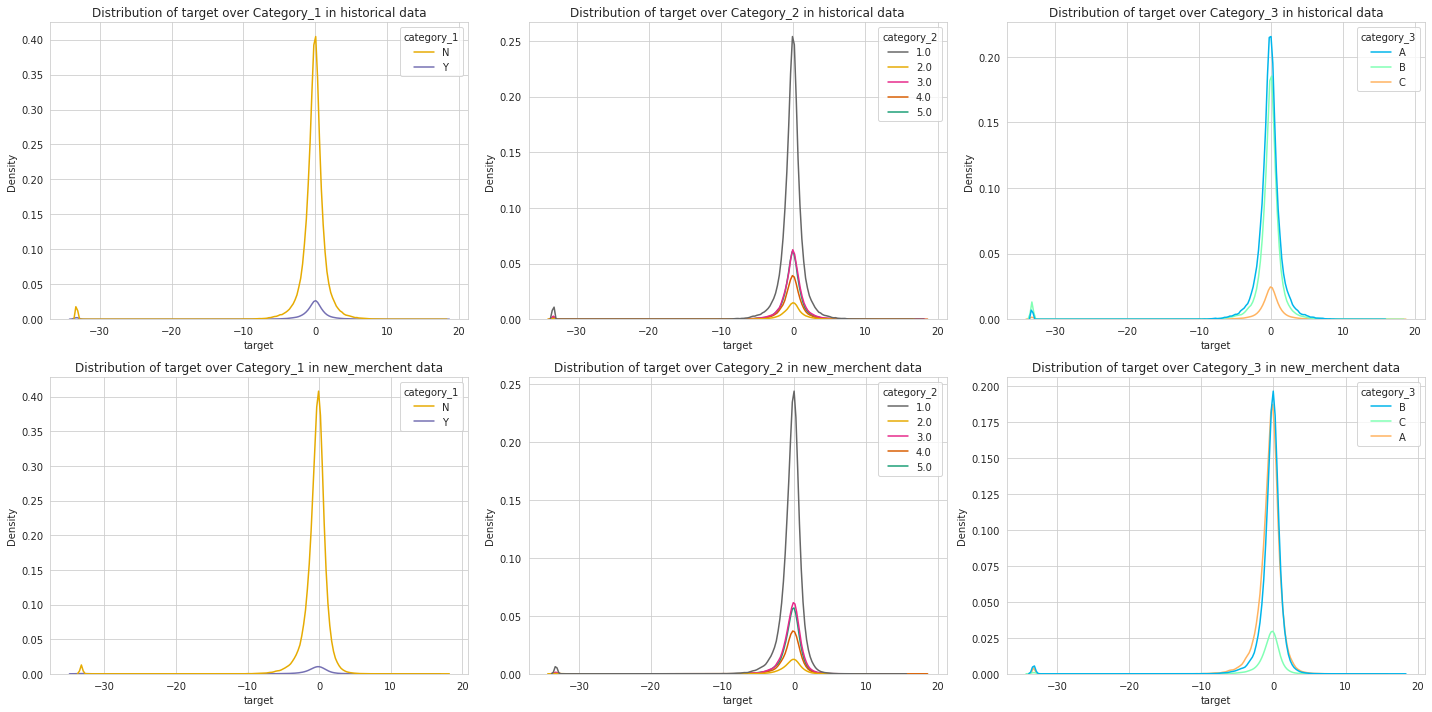

In [50]:
plt.figure(figsize = (20,10))
plt.subplot(231)
sns.kdeplot(x ='target',data = historical_data,hue = 'category_1',palette='Dark2_r')
plt.title("Distribution of target over Category_1 in historical data")
plt.subplot(232)
sns.kdeplot(x ='target',data = historical_data,hue = 'category_2',palette='Dark2_r')
plt.title("Distribution of target over Category_2 in historical data")
plt.subplot(233)
sns.kdeplot(x ='target',data = historical_data,hue = 'category_3',palette='rainbow')
plt.title("Distribution of target over Category_3 in historical data")
plt.subplot(234)
sns.kdeplot(x ='target',data = newmerchant_data,hue = 'category_1',palette='Dark2_r')
plt.title("Distribution of target over Category_1 in new_merchent data")
plt.subplot(235)
sns.kdeplot(x ='target',data = newmerchant_data,hue = 'category_2',palette='Dark2_r')
plt.title("Distribution of target over Category_2 in new_merchent data")
plt.subplot(236)
sns.kdeplot(x ='target',data = newmerchant_data,hue = 'category_3',palette='rainbow')
plt.title("Distribution of target over Category_3 in new_merchent data")
plt.tight_layout()
plt.show()

**Observations :**

* These three category features doesn't explicity help to differentiate the target Score(Loyalty Score). Every category have outliers in each of the sub_categories. And Almost all the category have Same IQR range.

* These anonymous features doesn't reveal any important info for further feature engineering of these categories.

**Note:** The same information can be gathered by using box-plot and violin-plot, I have tried all of them. Here, I use kdeplot as I found it more visually appealing. In further analysis I have used Box-plot more often.


In [51]:
# There are card_id without target
newmerchant_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984962 entries, 0 to 1984961
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   authorized_flag       1963031 non-null  object 
 1   card_id               1984962 non-null  object 
 2   city_id               1963031 non-null  float64
 3   category_1            1963031 non-null  object 
 4   installments          1963031 non-null  float64
 5   category_3            1907109 non-null  object 
 6   merchant_category_id  1963031 non-null  float64
 7   merchant_id           1936815 non-null  object 
 8   month_lag             1963031 non-null  float64
 9   purchase_amount       1963031 non-null  float64
 10  purchase_date         1963031 non-null  object 
 11  category_2            1851286 non-null  float64
 12  state_id              1963031 non-null  float64
 13  subsector_id          1963031 non-null  float64
 14  target                1241616 non-

**Authorized Flag Feature Analysis :**

Value counts for Authorized Flag of Historical Transactions :
Y    26595452
N     2516909
Name: authorized_flag, dtype: int64
*************************************************************
Value counts for Authorized Flag of New Merchant Transactions :
Y    1963031
Name: authorized_flag, dtype: int64


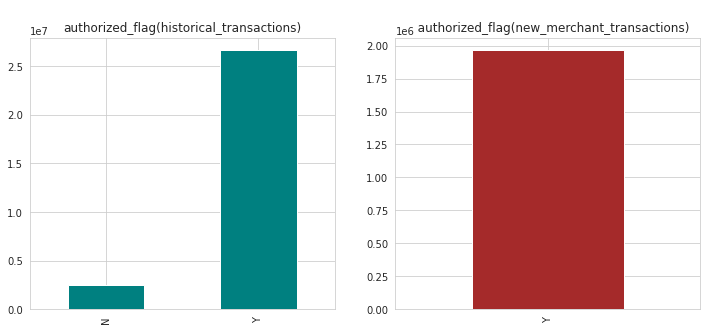

In [52]:
print('Value counts for Authorized Flag of Historical Transactions :')
print(historical_data['authorized_flag'].value_counts())
print('*************************************************************')
print('Value counts for Authorized Flag of New Merchant Transactions :')
print(newmerchant_data['authorized_flag'].value_counts())

#barplot for the authorized_flag feature
fig, ax = plt.subplots(1, 2, figsize = (12, 5));
historical_data['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='\nauthorized_flag(historical_transactions)');
newmerchant_data['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='\n   authorized_flag(new_merchant_transactions)');

**Observations :**

* The new transactions have no "N" category in authorized_flag. This historical transactions have both "Y" and "N".

* The authorized_flag 'Y' if approved, 'N' if denied - whether the transaction is approved or Denied.

* If we calculate percentage of authorized transaction in historical transaction. At average 91.3545% transactions are authorized.

* This feature is an important feature for predicting the Loyalty score. because, if the card's transactions are approved most of time, there is a great chance the cards can have high Loyalty Score

Distributions of target over authorized flag :

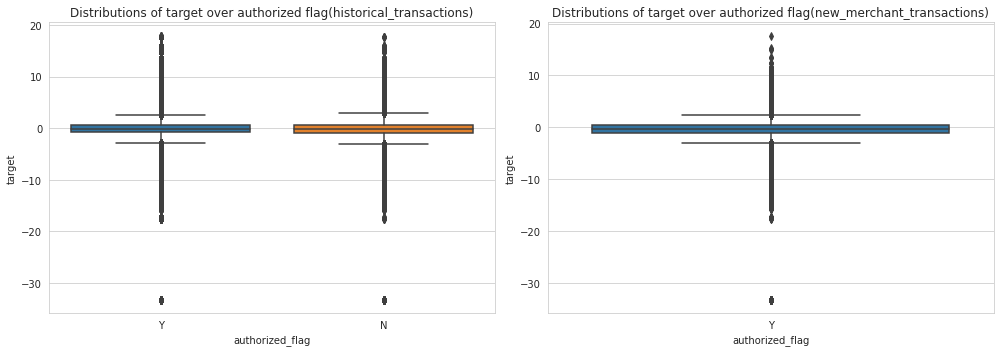

In [53]:
plt.figure(figsize = (14,5))
plt.subplot(121)
sns.boxplot(y = 'target',x= 'authorized_flag', data = historical_data)
plt.title("Distributions of target over authorized flag(historical_transactions)")
plt.subplot(122)
sns.boxplot(y = 'target',x= 'authorized_flag', data = newmerchant_data)
plt.title("Distributions of target over authorized flag(new_merchant_transactions)")
plt.tight_layout()
plt.show()

**Observations :** 

* The authorized Flag also doesn't give a suspectble change in the IQR range between authorized and un_authorized transactions.

* Even for the un_authorized transactions card users have same IQR. Because of the many transactions by an user, these un_authorized doesn't have much effect.

* But this categorical features also should be included using response coding (to represent the categorical data, probability of the data point belonging to a particular class given a category).

**Analysis of installments feature :**

In [54]:
print('Quantile values for installments in Historical Transaction :')
print('25th Percentile :',historical_data['installments'].quantile(0.25))
print('50th Percentile :',historical_data['installments'].quantile(0.50))
print('75th Percentile :',historical_data['installments'].quantile(0.75))
print('100th Percentile :',historical_data['installments'].quantile(1))
print('\n******************************************************************\n')
print('Quantile values for installments in New Merchant Transaction :')
print('25th Percentile :',newmerchant_data['installments'].quantile(0.25))
print('50th Percentile :',newmerchant_data['installments'].quantile(0.50))
print('75th Percentile :',newmerchant_data['installments'].quantile(0.75))
print('100th Percentile :',newmerchant_data['installments'].quantile(1))

Quantile values for installments in Historical Transaction :
25th Percentile : 0.0
50th Percentile : 0.0
75th Percentile : 1.0
100th Percentile : 999.0

******************************************************************

Quantile values for installments in New Merchant Transaction :
25th Percentile : 0.0
50th Percentile : 1.0
75th Percentile : 1.0
100th Percentile : 999.0


Distribution of target over installment feature :

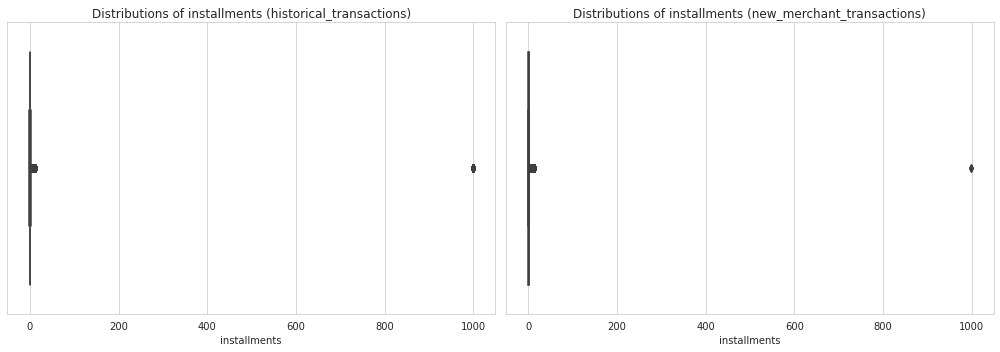

In [55]:
plt.figure(figsize = (14,5))
plt.subplot(121)
sns.boxplot(x=historical_data["installments"])
plt.title("Distributions of installments (historical_transactions)")
plt.subplot(122)
sns.boxplot(x=newmerchant_data["installments"])
plt.title("Distributions of installments (new_merchant_transactions)")
plt.tight_layout()
plt.show()

In [56]:
historical_data["installments"].describe()

count    2.911236e+07
mean     6.484954e-01
std      2.795577e+00
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      9.990000e+02
Name: installments, dtype: float64

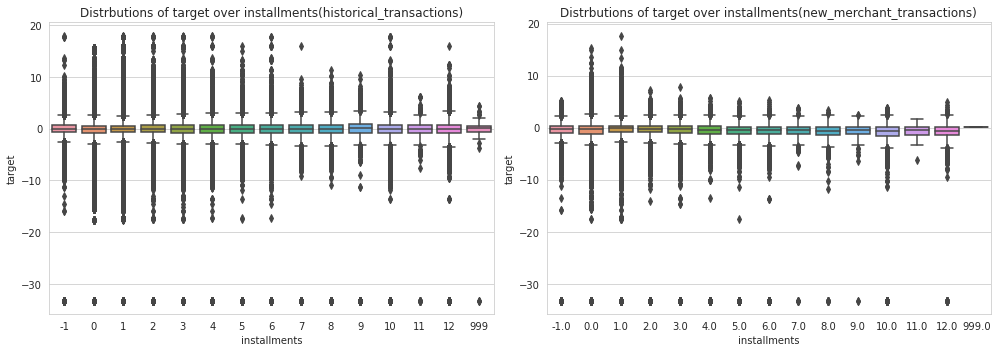

In [57]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(y='target',x= 'installments', data = historical_data)
plt.title("Distrbutions of target over installments(historical_transactions)")
plt.subplot(122)
sns.boxplot(y='target',x = 'installments', data = newmerchant_data)
plt.title("Distrbutions of target over installments(new_merchant_transactions)")
plt.tight_layout()
plt.show()

**Observations :** The installments also have outliers, these outliers should be taken care in data preprocessing. In historical_transactions and new_merchants_transactions the 75% of installments are below 1. So, most of the payments through the cards are instant payments or short term installments.

**Analysis of purchase_amount feature :**

In [58]:
print('Quantile values for purchase amount in Historical Transaction :')
print('25th Percentile :',historical_data['purchase_amount'].quantile(0.25))
print('50th Percentile :',historical_data['purchase_amount'].quantile(0.50))
print('75th Percentile :',historical_data['purchase_amount'].quantile(0.75))
print('100th Percentile :',historical_data['purchase_amount'].quantile(1))
print('\n******************************************************************\n')
print('Quantile values for purchase amount in New Merchant Transaction :')
print('25th Percentile :',newmerchant_data['purchase_amount'].quantile(0.25))
print('50th Percentile :',newmerchant_data['purchase_amount'].quantile(0.50))
print('75th Percentile :',newmerchant_data['purchase_amount'].quantile(0.75))
print('100th Percentile :',newmerchant_data['purchase_amount'].quantile(1))

Quantile values for purchase amount in Historical Transaction :
25th Percentile : -0.72035595
50th Percentile : -0.68834948
75th Percentile : -0.60325434
100th Percentile : 6010603.9717525

******************************************************************

Quantile values for purchase amount in New Merchant Transaction :
25th Percentile : -0.71662937
50th Percentile : -0.67484064
75th Percentile : -0.58161617
100th Percentile : 263.15749789


**Observation :** The IQR range value is very small. And there is one outlier which have 6010603.9717525. These outlier can skew the final model performance. purchase_amount is normalized. Let's have a look at it nevertheless.

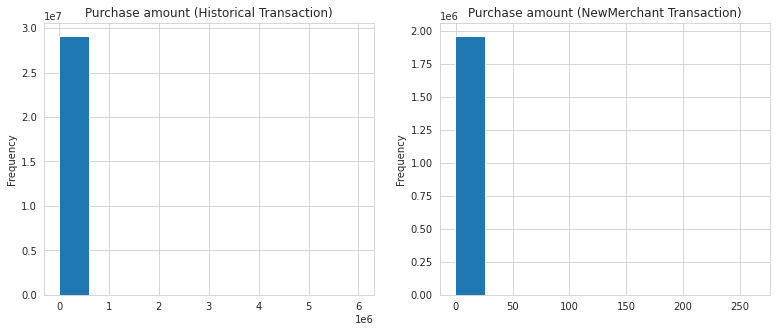

In [59]:
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.title('Purchase amount (Historical Transaction)');
historical_data['purchase_amount'].plot(kind='hist');
plt.subplot(122)
plt.title('Purchase amount (NewMerchant Transaction)');
newmerchant_data['purchase_amount'].plot(kind='hist');

In [60]:
historical_data['purchase_amount'].value_counts()

-0.671775    687283
-0.716855    600414
-0.701828    510925
-0.731881    417335
-0.596643    389066
              ...  
 4.478291         1
 1.915084         1
 5.089239         1
 2.085530         1
 5.400649         1
Name: purchase_amount, Length: 215014, dtype: int64

In [61]:
print('For purchase_amount in Historical transactions :')
for i in [-1, 0]:
    n = historical_data.loc[historical_data['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = historical_data.loc[historical_data['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")
    
print(70 * '-')

print('For purchase_amount in New Merchant transactions :')
for i in [-1, 0]:
    n = newmerchant_data.loc[newmerchant_data['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = newmerchant_data.loc[newmerchant_data['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")

For purchase_amount in Historical transactions :
There are 0 transactions with purchase_amount less than -1.
There are 28036884 transactions with purchase_amount less than 0.
There are 1075467 transactions with purchase_amount more than 0.
There are 14924 transactions with purchase_amount more than 10.
There are 1183 transactions with purchase_amount more than 100.
----------------------------------------------------------------------
For purchase_amount in New Merchant transactions :
There are 0 transactions with purchase_amount less than -1.
There are 1877357 transactions with purchase_amount less than 0.
There are 85674 transactions with purchase_amount more than 0.
There are 996 transactions with purchase_amount more than 10.
There are 2 transactions with purchase_amount more than 100.


**Observation :** As we can see the major chunk of transactions has purchase_amount less than 0. let us see Purchase amount distribution for negative values.

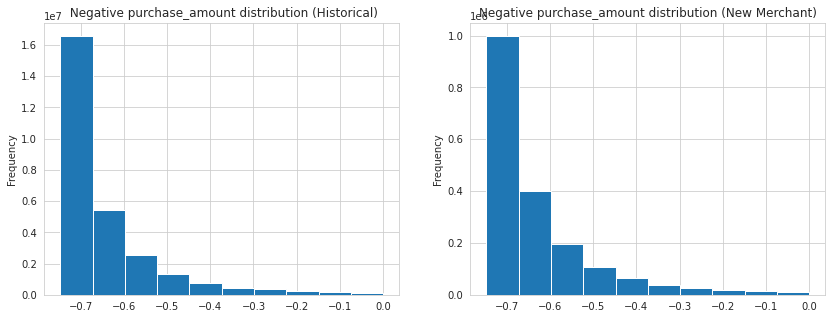

In [62]:
plt.figure(figsize = (14,5))
plt.subplot(121)
plt.title(' Negative purchase_amount distribution (Historical)');
historical_data.loc[historical_data['purchase_amount'] < 0, 'purchase_amount'].plot(kind='hist');
plt.subplot(122)
plt.title('Negative purchase_amount distribution (New Merchant)');
newmerchant_data.loc[newmerchant_data['purchase_amount'] < 0, 'purchase_amount'].plot(kind='hist');

**Observation :** It seems that almost all transactions have purchase amount in range (-1, 0). Quite a strong normalization and high outliers, which will need to be processed.

Now, let's see purchase_amount feature over target variable :



In [63]:
# Before removing detected outlier in 'historical_data'
historical_data.shape

(29112361, 15)

In [64]:
#There is one outlier which have value 6010603.9717525. We will remove it for further EDA.
historical_data = historical_data[historical_data['purchase_amount']  != 6010603.9717525]

In [65]:
# After removal from 'historical_data'
historical_data.shape

(29112360, 15)

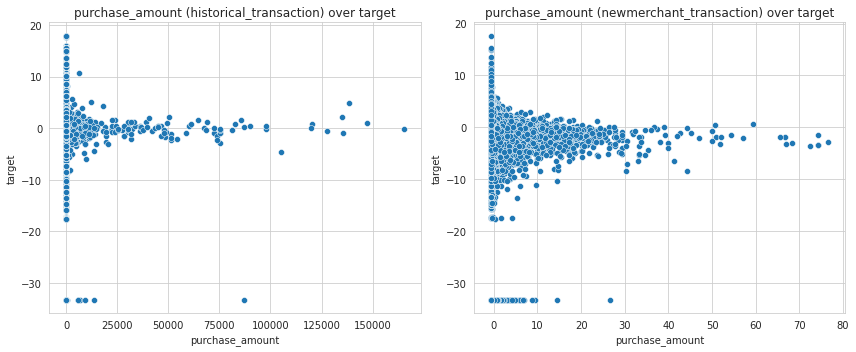

In [66]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(data=historical_data, x="purchase_amount", y="target")
plt.title("purchase_amount (historical_transaction) over target")
plt.subplot(122)
sns.scatterplot(data=newmerchant_data, x="purchase_amount", y="target")
plt.title("purchase_amount (newmerchant_transaction) over target")
plt.tight_layout()
plt.show()

**Observations :**

* One key observation here is, Most of the outliers in target having value around -30 are having very less purchase amount.
* With the increase in purchase amount customer become more loyal, as target score increases.???  Target loyalty score decrease with more purchase amount???

**Analysis of feature Month_lag :**

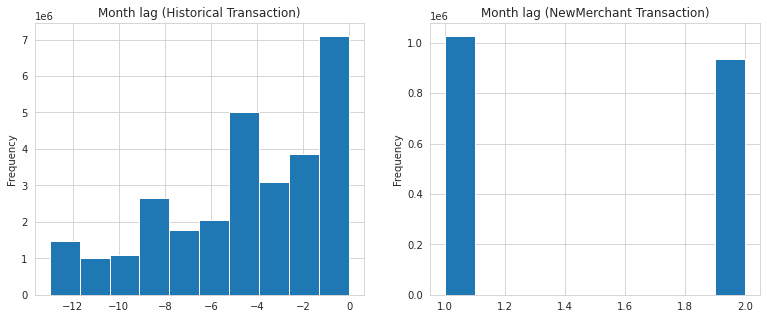

In [67]:
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.title('Month lag (Historical Transaction)');
historical_data['month_lag'].plot(kind='hist');
plt.subplot(122)
plt.title('Month lag (NewMerchant Transaction)');
newmerchant_data['month_lag'].plot(kind='hist');

Distribution of target over month_lag feature :

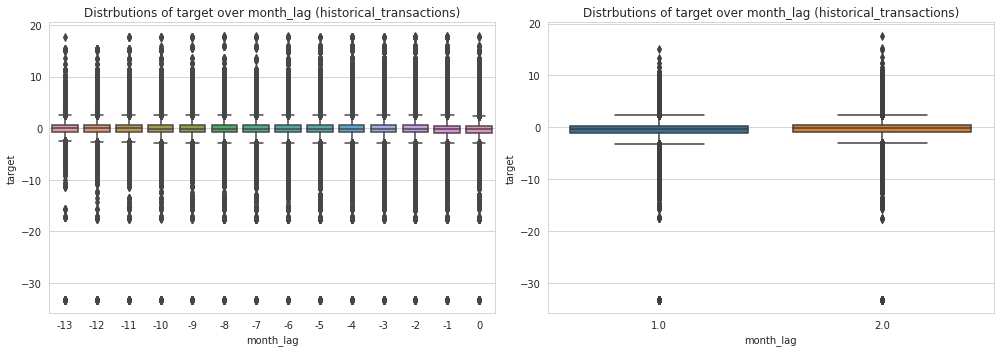

In [68]:
plt.figure(figsize = (14,5))
plt.subplot(121)
sns.boxplot(y= 'target',x= 'month_lag', data = historical_data)
plt.title("Distrbutions of target over month_lag (historical_transactions)")

plt.subplot(122)
sns.boxplot(y= 'target',x= 'month_lag', data = newmerchant_data)
plt.title("Distrbutions of target over month_lag (historical_transactions)")
plt.tight_layout()
plt.show()

**Observations :** 

* The Month_lag gives important info to predict the loyalty score. For a Purchase in installments, how many months the card lags from the actual end date of installment is the month_lag feature.

* The historical_transactions have month_lags from 0 to 13. which means the cards with transactions in histortical_transactions data have lag of installments from 0 to 13. But, the new_merchant_transactions have month_lag 1 and 2 only.

* This again proves the difference in the transactions type between the historical and new merchants.

In [69]:
newmerchant_data['month_lag'].value_counts()

1.0    1027617
2.0     935414
Name: month_lag, dtype: int64

**Analysis of feature 'purchase_date' :**

At first, we convert purchase_date to datetime format :

In [70]:
historical_data['purchase_date'] = pd.to_datetime(historical_data['purchase_date'],
                                                  format='%Y-%m-%d %H:%M:%S')
newmerchant_data['purchase_date'] = pd.to_datetime(newmerchant_data['purchase_date'],
                                                   format='%Y-%m-%d %H:%M:%S')

Number of transactions vs Year :

Year-Wise Percentage distribution of purchase_date (Historical-Transaction) :
2017    81.848631
2018    18.151369
Name: purchase_date, dtype: float64

Year-Wise Percentage distribution of purchase_date (NewMerchant-Transaction) :
2018.0    84.540081
2017.0    15.459919
Name: purchase_date, dtype: float64


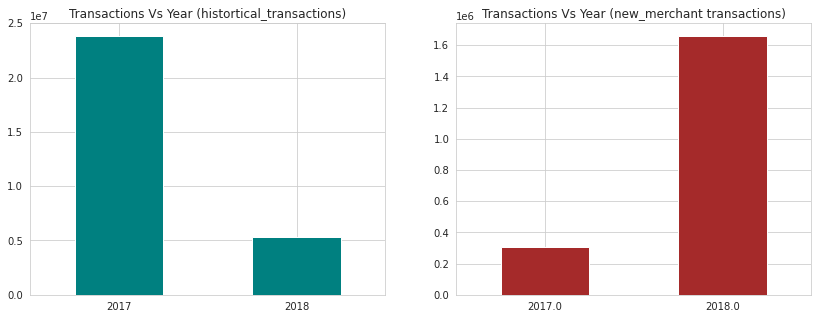

In [71]:
#barplot for the Number of transactions vs Year
fig, ax = plt.subplots(1, 2, figsize = (14, 5));
historical_data['purchase_date'].dt.year.value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal',
                                                                          title='Transactions Vs Year (histortical_transactions)', rot=0)
newmerchant_data['purchase_date'].dt.year.value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown',
                                                                           title='Transactions Vs Year (new_merchant transactions)', rot=0)


print('Year-Wise Percentage distribution of purchase_date (Historical-Transaction) :')
print(historical_data['purchase_date'].dt.year.value_counts(normalize = True)*100)
print('\nYear-Wise Percentage distribution of purchase_date (NewMerchant-Transaction) :')
print(newmerchant_data['purchase_date'].dt.year.value_counts(normalize = True)*100)

**Observations :**

* In historical_transactions, The transactions with respect to year 2017 is way more (~82%) than transactions in 2018 (18%). 

* But, In new_merchant_transactions, transactions with respect to 2018 is way more (~85%) than transactions in 2018 (15%).

* Then we can say, new_merchant_transactions are the recent year transactions. This is the reason for the disparity in the purchase amount and installment features.

Number of transactions vs Week

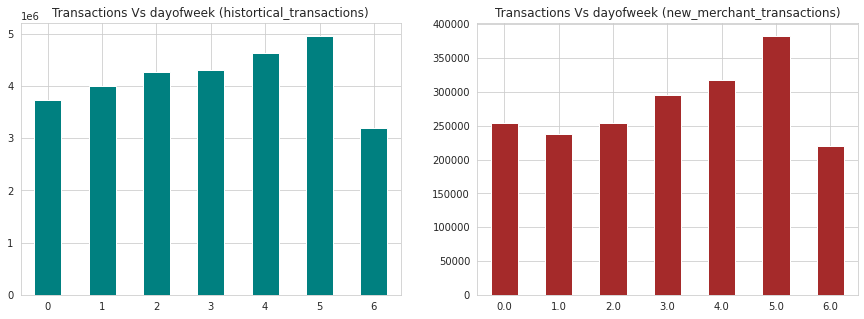

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5));
historical_data['purchase_date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal',
                                                                               title='Transactions Vs dayofweek (histortical_transactions)', rot=0);
newmerchant_data['purchase_date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown',
                                                                                title='Transactions Vs dayofweek (new_merchant_transactions)', rot=0);

Distribution of target over dayofweek :

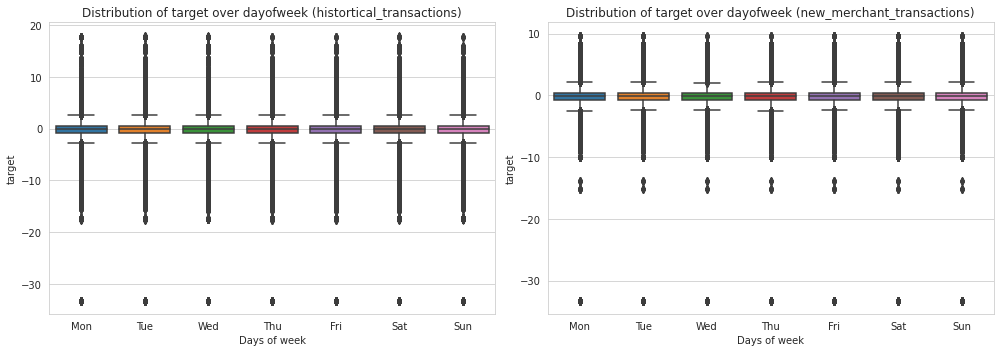

In [73]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(y = historical_data['target'], x = historical_data['purchase_date'].dt.dayofweek)
plt.xticks(range(0,7),labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Days of week')
plt.title("Distribution of target over dayofweek (histortical_transactions)")

plt.subplot(122)
sns.boxplot(y = historical_data['target'], x = newmerchant_data['purchase_date'].dt.dayofweek)
plt.xticks(range(0,7),labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Days of week')
plt.title("Distribution of target over dayofweek (new_merchant_transactions)")
plt.tight_layout()
plt.show()

Number of transactions vs hour

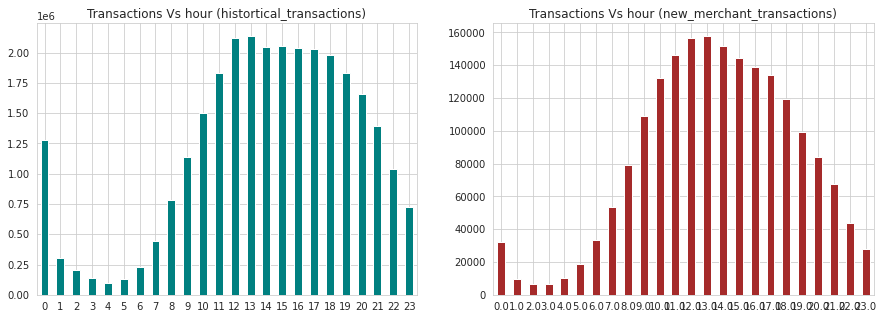

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5));
historical_data['purchase_date'].dt.hour.value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal',
                                                                          title='Transactions Vs hour (histortical_transactions)', rot=0);
newmerchant_data['purchase_date'].dt.hour.value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown',
                                                                           title='Transactions Vs hour (new_merchant_transactions)', rot=0);

Distribution of target over hour :

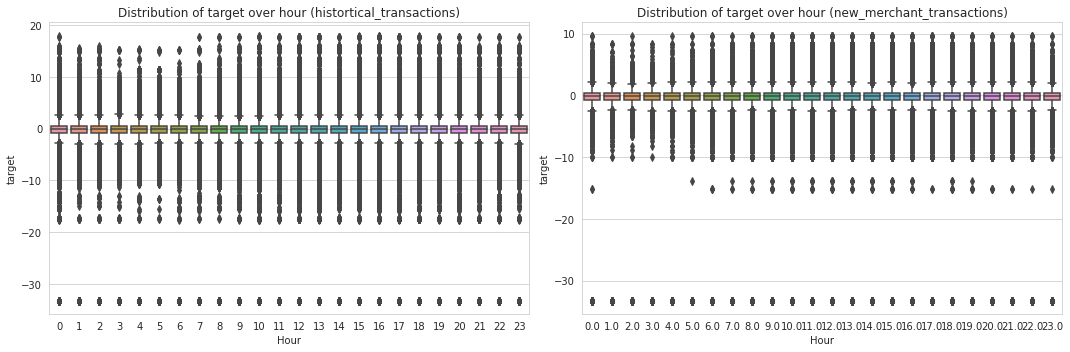

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(y = historical_data['target'], x = historical_data['purchase_date'].dt.hour)
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.title("Distribution of target over hour (histortical_transactions)")

plt.subplot(122)
sns.boxplot(y = historical_data['target'], x = newmerchant_data['purchase_date'].dt.hour)
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.title("Distribution of target over hour (new_merchant_transactions)")
plt.tight_layout()
plt.show()


**Observations :**

* From the distribution of both weekly and hourly transactions count, these transactions have not much difference in their distributions.

* Since, the data given in the problem is a generated data and not a real time data. The distribution of the transactions over the purchase date is similar.

* But, the type of transactions differs from historical and new_merchants in terms of purchase_amount, month_lag and installments.

* By checking the number of merchants are in both historical and new_merchants transactions, we can get exclusive informations of the merchants.

**Let's create a feature called Number of transactions for each card_id and see - How it impacts target variable ?**

Number of Transactions feature is not explicitly given in any of the file but we can derive it with some hacks :

In [76]:
# For historical transactions
g = historical_data[['card_id']].groupby('card_id')
df_transaction_counts = g.size().reset_index(name='num_transactions')
historical_data = pd.merge(historical_data ,df_transaction_counts, on="card_id",how='left')
historical_data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,target,num_transactions
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,NaN,400
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,NaN,400
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,NaN,400
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,NaN,400
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,NaN,400


In [77]:
historical_data['num_transactions'].describe()

count    2.911236e+07
mean     2.133682e+02
std      2.108363e+02
min      2.000000e+00
25%      7.800000e+01
50%      1.520000e+02
75%      2.840000e+02
max      5.582000e+03
Name: num_transactions, dtype: float64

In [78]:
#For New Merchant transaction
g = newmerchant_data[['card_id']].groupby('card_id')
df_transaction_counts = g.size().reset_index(name='num_transactions')
newmerchant_data = pd.merge(newmerchant_data ,df_transaction_counts, on="card_id",how='left')
newmerchant_data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,target,num_transactions
0,Y,C_ID_415bb3a509,107.0,N,1.0,B,307.0,M_ID_b0c793002c,1.0,-0.557574,2018-03-11 14:57:36,1.0,9.0,19.0,NaN,4
1,Y,C_ID_415bb3a509,140.0,N,1.0,B,307.0,M_ID_88920c89e8,1.0,-0.569580,2018-03-19 18:53:37,1.0,9.0,19.0,NaN,4
2,Y,C_ID_415bb3a509,330.0,N,1.0,B,507.0,M_ID_ad5237ef6b,2.0,-0.551037,2018-04-26 14:08:44,1.0,9.0,14.0,NaN,4
3,Y,C_ID_415bb3a509,-1.0,Y,1.0,B,661.0,M_ID_9e84cda3b1,1.0,-0.671925,2018-03-07 09:43:21,NaN,-1.0,8.0,NaN,4
4,Y,C_ID_ef55cf8d4b,-1.0,Y,1.0,B,166.0,M_ID_3c86fa3831,1.0,-0.659904,2018-03-22 21:07:53,NaN,-1.0,29.0,-4.839243,22


In [79]:
newmerchant_data['num_transactions'].describe()

count    1.984962e+06
mean     1.322025e+01
std      1.059866e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.800000e+01
max      1.090000e+02
Name: num_transactions, dtype: float64

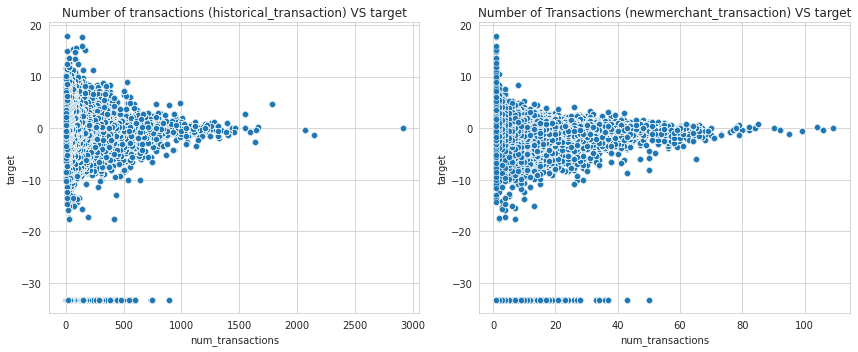

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(data=historical_data, x="num_transactions", y="target")
plt.title("Number of transactions (historical_transaction) VS target")
plt.subplot(122)
sns.scatterplot(data=newmerchant_data, x="num_transactions", y="target")
plt.title("Number of Transactions (newmerchant_transaction) VS target")
plt.tight_layout()
plt.show()

**Observations :**

* One key observation here is, Most of the outliers in target having value around -30 are having very less no of transactions.
* With increase in no of transactions customer become more loyal, as target score increases???

**Correlation between variables : Variance Inflation Factor**

In [81]:
selected_columns = ['category_2','month_lag','purchase_amount','state_id','subsector_id', 'installments']
data_frame = newmerchant_data[selected_columns]

data_frame = data_frame.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,2.961368,category_2
1,6.079920,month_lag
2,1.769963,purchase_amount
3,4.753116,state_id
4,5.733107,subsector_id
5,1.186565,installments


All values are under 10, let's add some more features and again we'll calculate the VIF :




In [82]:
Dict = {'A':1,'B':2,'C':3}
Dict1 = {'Y':1,'N':0}

selected_columns = ['authorized_flag','category_3','category_2','month_lag','purchase_amount','state_id','subsector_id', 'installments']
data_frame = newmerchant_data[selected_columns]
data_frame['category_3'] = data_frame['category_3'].map(Dict)
data_frame['authorized_flag'] = data_frame['authorized_flag'].map(Dict1)

data_frame = data_frame.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,31.880430,authorized_flag
1,1.493133,category_3
2,1.021653,category_2
3,1.000173,month_lag
4,1.067406,purchase_amount
5,1.021572,state_id
6,1.010238,subsector_id
7,1.528135,installments


**Observations :**

* The value for the authorized flag is somewhat higher, it is around 32 which indicates possible correlation. So this variable needs further investigation.

* Other than the authorized flag the remaining variables doesn't look correlated. They are well under 2.

<h2>Exploring the Merchant Data :</h2>



In [83]:
# Read excel-formatted data dictionary file with pandas
#data_dictionary = pd.read_excel('../input/elo-merchant-category-recommendation/Data_Dictionary.xlsx', sheet_name='merchant')
#data_dictionary

In [84]:
merchants_data.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [85]:
merchants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int32  
 2   merchant_category_id         334696 non-null  int16  
 3   subsector_id                 334696 non-null  int8   
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int8   
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [86]:
merchants_data.isna().any()

merchant_id                    False
merchant_group_id              False
merchant_category_id           False
subsector_id                   False
numerical_1                    False
numerical_2                    False
category_1                     False
most_recent_sales_range        False
most_recent_purchases_range    False
avg_sales_lag3                  True
avg_purchases_lag3             False
active_months_lag3             False
avg_sales_lag6                  True
avg_purchases_lag6             False
active_months_lag6             False
avg_sales_lag12                 True
avg_purchases_lag12            False
active_months_lag12            False
category_4                     False
city_id                        False
state_id                       False
category_2                      True
dtype: bool

**Observations :** Merchant data has missing values in columns : avg_sales_lag3, avg_sales_lag6 and avg_sales_lag12 

**Analysis of Numerical features : numerical_1 and numerical_2**

In [87]:
print('Quantile values for numeric_1 in Transaction data:')
print('25th Percentile :',merchants_data['numerical_1'].quantile(0.25))
print('50th Percentile :',merchants_data['numerical_1'].quantile(0.50))
print('75th Percentile :',merchants_data['numerical_1'].quantile(0.75))
print('100th Percentile :',merchants_data['numerical_1'].quantile(1))
print('\n******************************************************************\n')
print('Quantile values for numeric_2 in Transaction data:')
print('25th Percentile :',merchants_data['numerical_2'].quantile(0.25))
print('50th Percentile :',merchants_data['numerical_2'].quantile(0.50))
print('75th Percentile :',merchants_data['numerical_2'].quantile(0.75))
print('100th Percentile :',merchants_data['numerical_2'].quantile(1))

Quantile values for numeric_1 in Transaction data:
25th Percentile : -0.05747065
50th Percentile : -0.05747065
75th Percentile : -0.04755575
100th Percentile : 183.73511137

******************************************************************

Quantile values for numeric_2 in Transaction data:
25th Percentile : -0.05747065
50th Percentile : -0.05747065
75th Percentile : -0.04755575
100th Percentile : 182.07932234


**Observation :** I think the Distribution of numerical_1 and numerical_2 featurs are almost identical, because three quantiles have identical values.

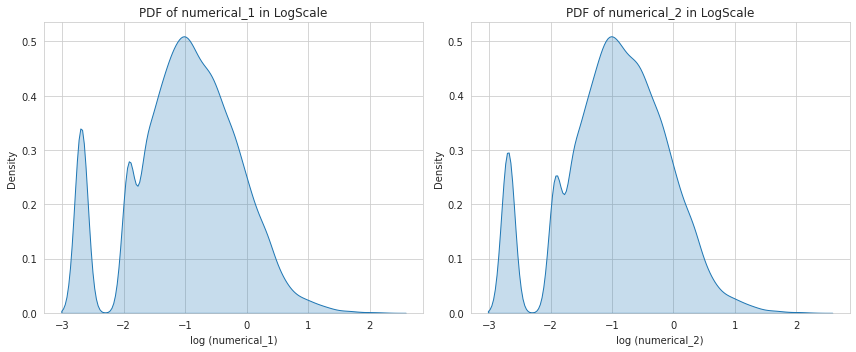

In [88]:
plt.figure(figsize=(12,5) )
plt.subplot(121)
sns.kdeplot(np.log10(merchants_data['numerical_1']),shade=True)
plt.title("PDF of numerical_1 in LogScale")
plt.xlabel('log (numerical_1)')
plt.subplot(122)
sns.kdeplot(np.log10(merchants_data['numerical_2']),shade=True)
plt.title("PDF of numerical_2 in LogScale")
plt.xlabel('log (numerical_2)')
plt.tight_layout()
plt.show()

**Observation :** After plotting PDF, it is very clear that both the features have same distribution, may be they are duplicates of each other.

**Note :** The values for numeric_1 and numeric_2 are mostly -ve and very near to zero. So, I preferred LogScale for analysis.

**Analysis of the three anonymized category features : category_1,category_2 and category_4**

Value counts for category features of Merchants data :

N    327657
Y      7039
Name: category_1, dtype: int64
******************************
1.0    160888
5.0     52923
3.0     51887
4.0     36450
2.0     20661
Name: category_2, dtype: int64
******************************
N    238596
Y     96100
Name: category_4, dtype: int64


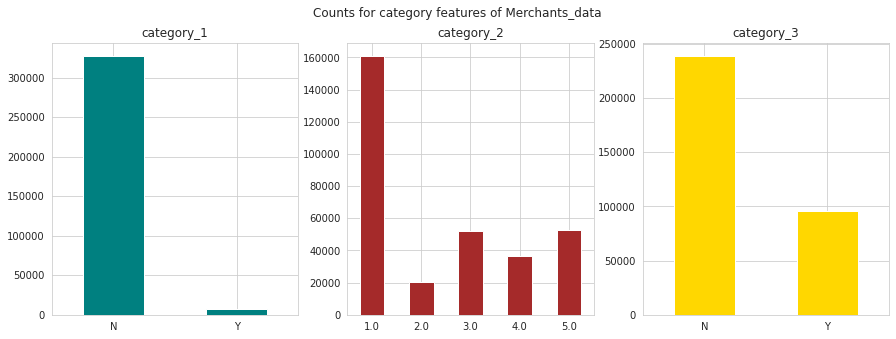

In [89]:
print('Value counts for category features of Merchants data :\n')
print(merchants_data['category_1'].value_counts())
print('******************************')
print(merchants_data['category_2'].value_counts())
print('******************************')
print(merchants_data['category_4'].value_counts())

fig, ax = plt.subplots(1, 3, figsize = (15, 5));
merchants_data['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='category_1', rot=0);
merchants_data['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2', rot=0);
merchants_data['category_4'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_3', rot=0);
plt.suptitle('Counts for category features of Merchants_data');

**Observation :** These are anonymous categories, which can represent some properties of the merchants, which is still unclear after merging with the transactions data it can reveal more info.

**Analysis of 'feature most_recent_sales_range' and 'most_recent_purchases_range' :**

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64
*******************************************
E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64


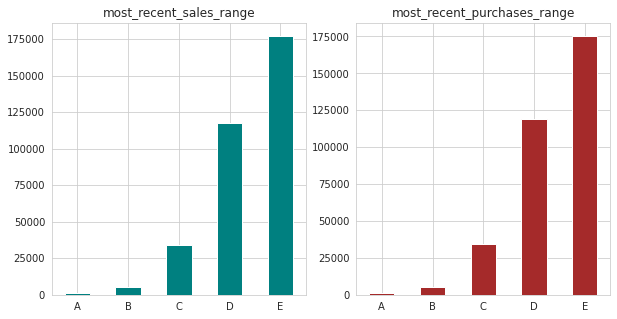

In [90]:
print(merchants_data['most_recent_sales_range'].value_counts())
print('*******************************************')
print(merchants_data['most_recent_purchases_range'].value_counts())

fig, ax = plt.subplots(1, 2, figsize = (10, 5));
merchants_data['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal',
                                                                           title='most_recent_sales_range', rot=0);
merchants_data['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown',
                                                                               title='most_recent_purchases_range', rot=0);

**Observations :**

* Both the features have very similar distributions.

* The sales range in last active month is a categorical feature with "A","B","C","D","E". after observing the trend from graph we can say Range of revenue (monetary units) is in order E > D > C > B > A.

* The Bar Plot shows there are many merchants with revenue range of "E" than other ranges.

* And also, Bar Plot shows there are many merchants with purchase quantity range of "E" than other ranges.

* The sales range and purchase range can be used in aggregated to know the card_id's most visited merchants in the final features for training.

**Analysis of Sales Average features :
'avg_sales_lag3', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12'**


In [91]:
print('Quantile values for avg_sales_lag3 in Transaction data:')
print('25th Percentile :',merchants_data['avg_sales_lag3'].quantile(0.25))
print('50th Percentile :',merchants_data['avg_sales_lag3'].quantile(0.50))
print('75th Percentile :',merchants_data['avg_sales_lag3'].quantile(0.75))
print('100th Percentile :',merchants_data['avg_sales_lag3'].quantile(1))
print('\n******************************************************************\n')
print('Quantile values for avg_sales_lag6 in Transaction data:')
print('25th Percentile :',merchants_data['avg_sales_lag6'].quantile(0.25))
print('50th Percentile :',merchants_data['avg_sales_lag6'].quantile(0.50))
print('75th Percentile :',merchants_data['avg_sales_lag6'].quantile(0.75))
print('100th Percentile :',merchants_data['avg_sales_lag6'].quantile(1))
print('Quantile values for numeric_1 in Transaction data6:')
print('\n******************************************************************\n')
print('Quantile values for avg_sales_lag12 in Transaction data:')
print('25th Percentile :',merchants_data['avg_sales_lag12'].quantile(0.25))
print('50th Percentile :',merchants_data['avg_sales_lag12'].quantile(0.50))
print('75th Percentile :',merchants_data['avg_sales_lag12'].quantile(0.75))
print('100th Percentile :',merchants_data['avg_sales_lag12'].quantile(1))

Quantile values for avg_sales_lag3 in Transaction data:
25th Percentile : 0.88
50th Percentile : 1.0
75th Percentile : 1.16
100th Percentile : 851844.64

******************************************************************

Quantile values for avg_sales_lag6 in Transaction data:
25th Percentile : 0.85
50th Percentile : 1.01
75th Percentile : 1.23
100th Percentile : 1513959.0
Quantile values for numeric_1 in Transaction data6:

******************************************************************

Quantile values for avg_sales_lag12 in Transaction data:
25th Percentile : 0.85
50th Percentile : 1.02
75th Percentile : 1.29
100th Percentile : 2567408.0


In [92]:
print('Statistical insights for avg_purchases_lag3 in Transaction data:')
print(merchants_data['avg_purchases_lag3'].describe())
print('\n******************************************************************\n')
print('Statistical insights for avg_purchases_lag6 in Transaction data:')
print(merchants_data['avg_purchases_lag6'].describe())
print('\n******************************************************************\n')
print('Statistical insights for avg_purchases_lag12 in Transaction data:')
print(merchants_data['avg_purchases_lag12'].describe())

Statistical insights for avg_purchases_lag3 in Transaction data:
count    3.346960e+05
mean              inf
std               NaN
min      3.334953e-01
25%      9.236499e-01
50%      1.016667e+00
75%      1.146522e+00
max               inf
Name: avg_purchases_lag3, dtype: float64

******************************************************************

Statistical insights for avg_purchases_lag6 in Transaction data:
count    3.346960e+05
mean              inf
std               NaN
min      1.670447e-01
25%      9.022475e-01
50%      1.026961e+00
75%      1.215575e+00
max               inf
Name: avg_purchases_lag6, dtype: float64

******************************************************************

Statistical insights for avg_purchases_lag12 in Transaction data:
count    3.346960e+05
mean              inf
std               NaN
min      9.832954e-02
25%      8.983333e-01
50%      1.043361e+00
75%      1.266480e+00
max               inf
Name: avg_purchases_lag12, dtype: float64


**Observation :** There are outliers with the value inf in each of these columns, we have to deal with it. For EDA part, I am removing the corresponding rows with the inf values in the columns avg_purchases_lag3, avg_purchases_lag6, avg_purchases_lag12. We will see what else we can do with these outliers in preprocessing part.

In [93]:
merchants_data = merchants_data[merchants_data['avg_purchases_lag3']  != np.inf]
merchants_data = merchants_data[merchants_data['avg_purchases_lag6']  != np.inf]
merchants_data = merchants_data[merchants_data['avg_purchases_lag12']  != np.inf]

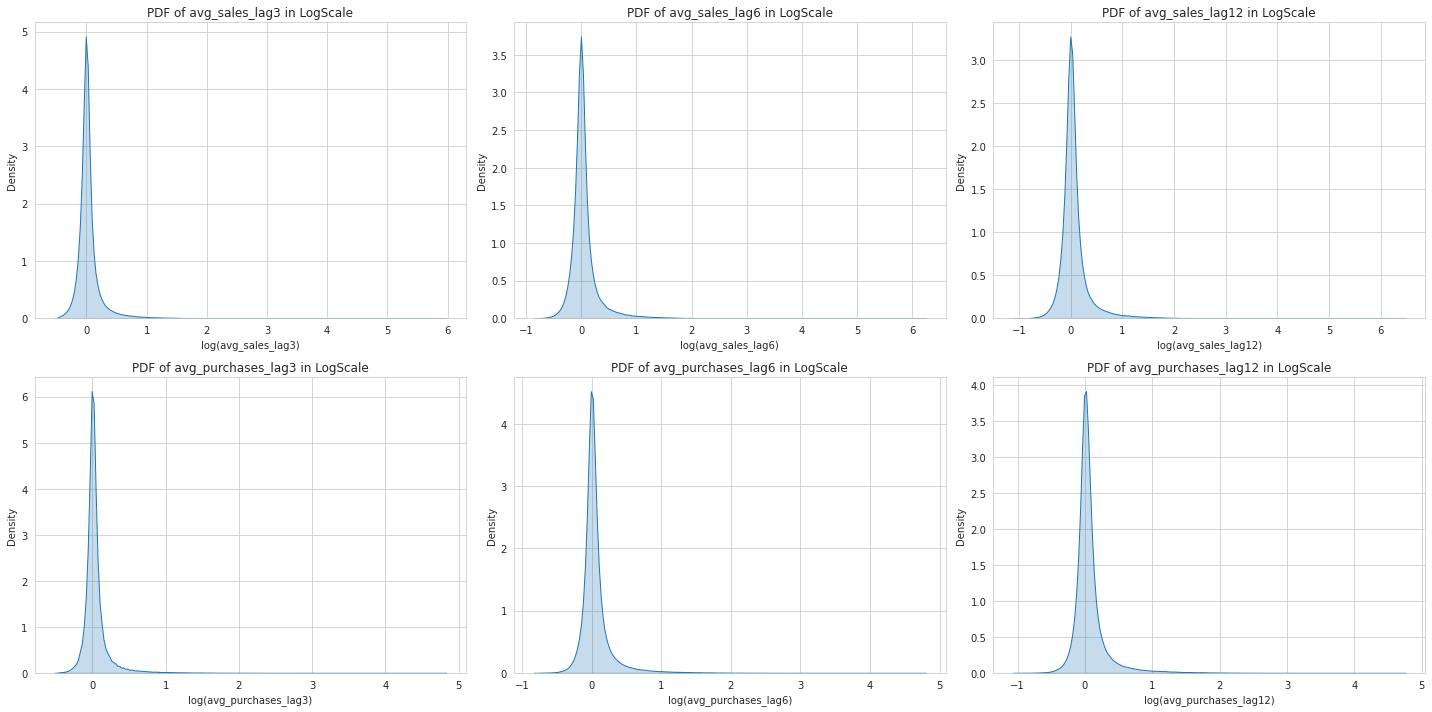

In [94]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.kdeplot(np.log10(merchants_data['avg_sales_lag3']),shade=True)
plt.title("PDF of avg_sales_lag3 in LogScale")
plt.xlabel('log(avg_sales_lag3)')
plt.subplot(232)
sns.kdeplot(np.log10(merchants_data['avg_sales_lag6']),shade=True)
plt.title("PDF of avg_sales_lag6 in LogScale")
plt.xlabel('log(avg_sales_lag6)')
plt.subplot(233)
sns.kdeplot(np.log10(merchants_data['avg_sales_lag12']),shade=True)
plt.title("PDF of avg_sales_lag12 in LogScale")
plt.xlabel('log(avg_sales_lag12)')
plt.subplot(234)
sns.kdeplot(np.log10(merchants_data['avg_purchases_lag3']),shade=True)
plt.title("PDF of avg_purchases_lag3 in LogScale")
plt.xlabel('log(avg_purchases_lag3)')
plt.subplot(235)
sns.kdeplot(np.log10(merchants_data['avg_purchases_lag6']),shade=True)
plt.title("PDF of avg_purchases_lag6 in LogScale")
plt.xlabel('log(avg_purchases_lag6)')
plt.subplot(236)
sns.kdeplot(np.log10(merchants_data['avg_purchases_lag12']),shade=True)
plt.title("PDF of avg_purchases_lag12 in LogScale")
plt.xlabel('log(avg_purchases_lag12)')
plt.tight_layout()
plt.show()

**Observations :** 

* The average purchases and sales across 3, 6 and 12 months are distributed near 1.

* And, there are outliers in all the average sales and purchases. These features gives info about the merchants but not about the card_id's. The information about the merchants have to cumulated for each card_id's.

**Note :** The values for All the sales features listed above are mostly surrounded very near to 1. So, I preferred LogScale for analysis.

**Quantity of active months : Analysis of features ('active_months_lag3', 'active_months_lag6' and 'active_months_lag12') :**

3    333259
2       896
1       538
Name: active_months_lag3, dtype: int64
**********************************
6    327281
5      2276
4      2050
3      1652
2       896
1       538
Name: active_months_lag6, dtype: int64
**********************************
12    305098
11      4449
10      4143
9       3824
8       3756
7       3274
6       2737
5       2276
4       2050
3       1652
2        896
1        538
Name: active_months_lag12, dtype: int64


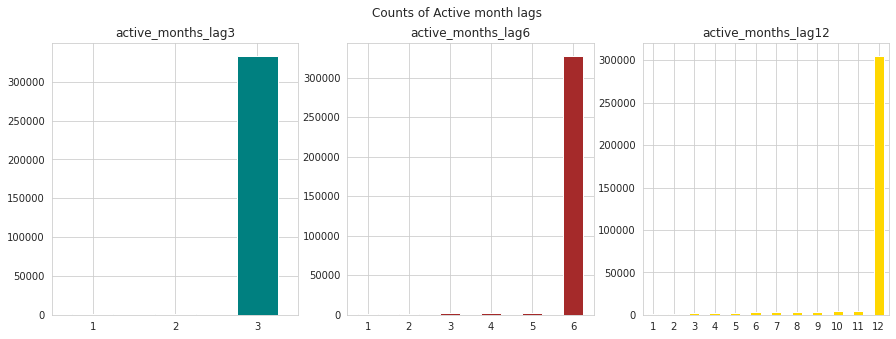

In [95]:
print(merchants_data['active_months_lag3'].value_counts())
print('**********************************')
print(merchants_data['active_months_lag6'].value_counts())
print('**********************************')
print(merchants_data['active_months_lag12'].value_counts())

fig, ax = plt.subplots(1, 3, figsize = (15, 5));
merchants_data['active_months_lag3'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal',
                                                                      title='active_months_lag3', rot=0);
merchants_data['active_months_lag6'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown',
                                                                      title='active_months_lag6', rot=0);
merchants_data['active_months_lag12'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold',
                                                                       title='active_months_lag12', rot=0);
plt.suptitle('Counts of Active month lags');

**Observations :** The active months features are greatly skewed and doesn't provide any vital information about the cards.

**Correlation between variables : Variance Inflation Factor**

In [96]:
selected_columns = ['numerical_1', 'numerical_2','category_2','avg_sales_lag3','avg_sales_lag6','avg_sales_lag12','avg_purchases_lag3','avg_purchases_lag6','avg_purchases_lag12','active_months_lag3','active_months_lag6','active_months_lag12']
data_frame = merchants_data[selected_columns]
data_frame = data_frame.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,399.574679,numerical_1
1,399.550623,numerical_2
2,3.312617,category_2
3,45.881709,avg_sales_lag3
4,252.021643,avg_sales_lag6
5,130.293215,avg_sales_lag12
6,398.529705,avg_purchases_lag3
7,1603.753930,avg_purchases_lag6
8,580.461849,avg_purchases_lag12
9,512.152932,active_months_lag3


**Observation :** Looks like there are variables which are heavily correlated like 'active_months_lag6', 'avg_purchase_lag6' and 'avg_sales_lag_6' and 'avg_purchase_lag12' and as we seen before the 'numerical_1' and 'numerical_2' have similar values and distributions and they are correlated.



**TOTAL OBSERVATIONS :**

1) Target variable i.e. Loyalty scores are real-numbers, It directly gives us the intuition that we have to go for a supervised machine learning regression model to solve this problem.

2) The data files are train, test, new_merchant, merchant and historical transactions. but datasets are largely anonymized, and the meaning of the features are not elaborated.

3) The dimensionality of train and test data is very less. That clearly shows that the information provided is not sufficient for training. As only three features have been given in the train file which seems to be not sufficient to make good predictions. More features must be added to this with the help of domain knowledge and the business problem given.

4) Distribution of both the train and test are almost identical. So there is no time based splitting in the make over of the data. And, it assures for prediction of the test data.

5) The target variable is normally distributed but, there are outliers which seems to be accumulated around -30.

6) Data is not complete as nan values are present in the merchants, historical and new merchants transactions, so these missing values must be imputed for better predciton.

7) One-hot encoding/response coding of categorical features should be done for better prediction. The categorical features present across dataset are large in number than numerical features. 

8) Merchants data have high number of correlated features in it as compared to other data files. This is suggested by the calcuation of the VIF Scores 

9) The time features can reveal the inherent property of the transactions and the transactions are time dependent, the engineered features from the features like purchase_date will be useful in prediction.

10) In the historical transactions data there is this feature called 'authorized_flag' count which indicates whether the transaction is authorized or not. There is very less number of transactions which is not authorized. Considering this flag features as a separater in the feature engineering can results can give better prediction.

At the End of the Exploration of the transactions, merchants and train data, the given features of transactions are not big factor for the calculation of the target Score.

There exist an aggregrated or engineered feature or features which can be helpful in predicting the target Score.

With the different feature engineering techniques and market research techniques we have to produce the new feaures which may or may not be very useful in the prediction model.

By implementing the major feature engineering ideas we have to produce features and build model upon it.

# End of EDA and beginning of ML